# Dementia Exploratory Data Analysis (EDA)

This notebook is used to analyze the ADNI data set and its respective preprocessing.

In [1]:
import os, random, time, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from jarvis.train.client import Client
from jarvis.utils.general import overload, tools as jtools
from jarvis.utils.display import imshow

In [2]:
@overload(Client)
def preprocess(self, arrays, **kwargs):
    
    # --- Extract pre-calculated whole exam mu/sd and normalize
    arrays['xs']['dat'] = (arrays['xs']['dat'] - kwargs['row']['mu']) / kwargs['row']['sd']
    
    # --- Scale to 0/1 using 5/95 percentiles
    lower = np.percentile(arrays['xs']['dat'], 1)
    upper = np.percentile(arrays['xs']['dat'], 99)
    arrays['xs']['dat'] = arrays['xs']['dat'].clip(min=lower, max=upper)
    arrays['xs']['dat'] = (arrays['xs']['dat'] - lower) / (upper - lower)
    
    return arrays

In [4]:
# --- Initialize client
client = Client('/home/mmorelan/proj/dementia/yml/client-3d-raw_AD_AV45_only.yml', configs={'batch': {'fold': 0}})

In [5]:
# --- Create validation generator
gen_train, gen_valid = client.create_generators()

0.0 1.0


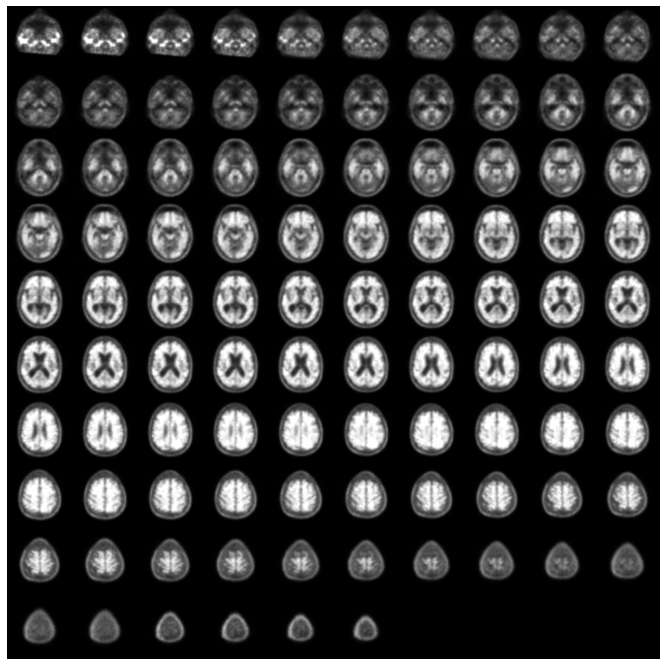

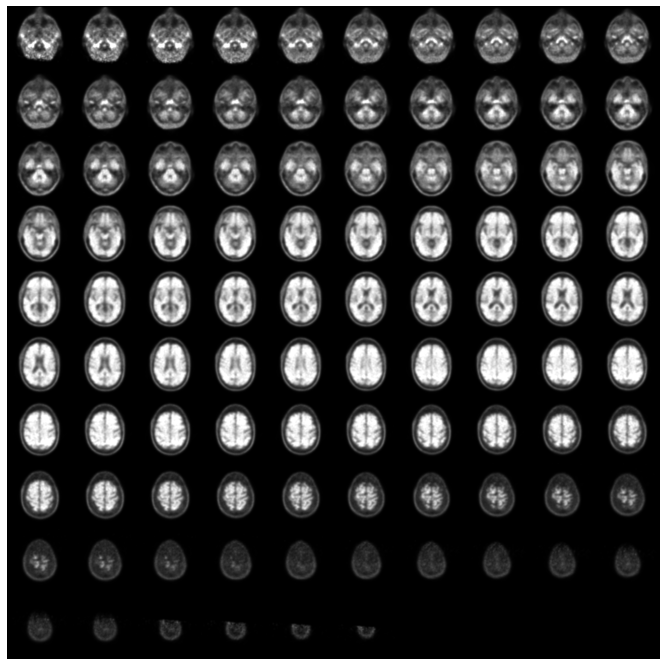

In [8]:
x, y = next(gen_train)
print(x['dat'][0].min(), x['dat'][0].max())
imshow(x['dat'][0], figsize=(12, 12))
plt.show()
imshow(x['dat'][1], figsize=(12, 12))
plt.show()